In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"


In [2]:
data_dir = "../data/apple_products_cleaned_final.csv"
df = pd.read_csv(data_dir)
columns = ['Released', 'Model', 'Family', 'Discontinued']
df = df[columns]

In [3]:
df.head()

Released              Model           Family Discontinued
0  1976-04-11            Apple I          Apple I   1977-09-30
1  1977-06-01           Apple II         Apple II   1979-05-01
2  1978-06-01            Disk II           Drives   1984-05-01
3  1979-06-01      Apple II Plus  Apple II series   1982-12-01
4  1979-06-01  Apple II EuroPlus  Apple II series   1982-12-01

In [4]:
# get those rows where Discontinued is today
# df.loc[df['Discontinued'] == 'current', 'Discontinued']  = pd.to_datetime('today').strftime('%B %d, %Y')

In [5]:
df['Released'] = pd.to_datetime(df['Released'])
df['Discontinued'] = pd.to_datetime(df['Discontinued'])

In [18]:
# df.to_csv('../data/apple_products_cleaned_final.csv', index=False)

In [6]:
min_time_released = df["Released"].min()
max_time_released = df["Released"].max()
min_time_released

Timestamp('1976-04-11 00:00:00')

In [7]:
def df_info_timewise(time):
    all_df = df[df["Released"]<= time]
    released_products = all_df["Model"].nunique()
    discontinued_products = all_df[all_df["Discontinued"]<= time]["Model"].nunique()
    current_products = all_df[all_df["Discontinued"]> time]["Model"].nunique()
    families = all_df["Family"].nunique()
    return released_products, discontinued_products, current_products, families

In [8]:
years = pd.date_range(start=min_time_released, end=max_time_released, freq="Y")
# times = [f"{y}-12-31" for y in years.year]
released_products = []
discontinued_products = []
current_products = []
families = []
for time in years:
    r, d, c, f = df_info_timewise(time)
    released_products.append(r)
    discontinued_products.append(d)
    current_products.append(c)
    families.append(f)

df_info = pd.DataFrame(
    {
        "Year": years.year,
        "Total Products Released": released_products,
        "Total Products Discountinued": discontinued_products,
        "Current Products": current_products,
        "Total Families": families,
    }
)

In [9]:
figure = px.line(
    df_info,
    x="Year",
    y=["Total Products Released", "Total Products Discountinued", "Current Products"],
    title="Apple Products Timeline",
    labels={
        "value": "Number of Products",
        "variable": "Type of Products",
        "Year": "Year"
    },
)
figure

In [10]:
#Create an animation
figure = px.line(
    df_info,
    x="Year",
    y=["Total Products Released", "Total Products Discountinued", "Current Products"],
    title="Apple Products Timeline",
    labels={
        "value": "Number of Products",
        "variable": "Type of Products",
        "Year": "Year"
    },
    # animation_frame="Year",
    # animation_group="Year"
)
figure

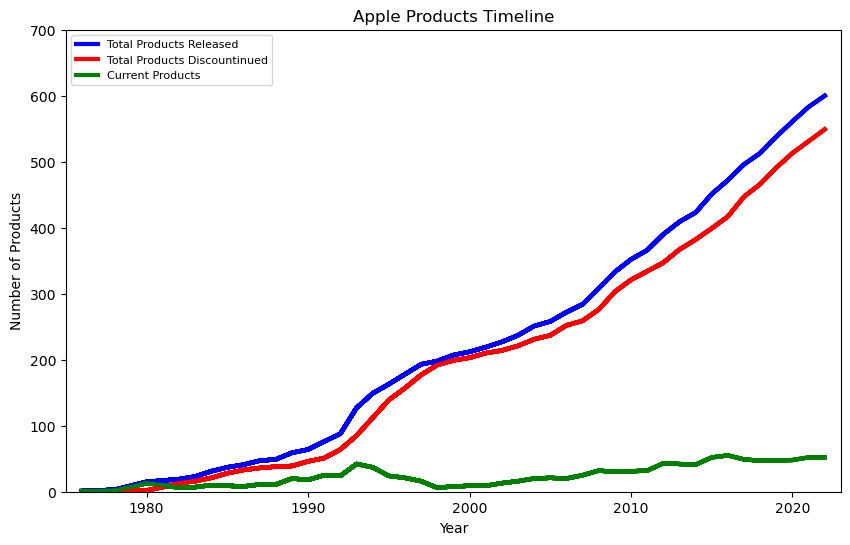

In [32]:
#Create an animation using matplotlib
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(1975, 2023)
ax.set_ylim(0, 700)
ax.set_xlabel("Year")
ax.set_ylabel("Number of Products")
ax.set_title("Apple Products Timeline")

def animate(i):
    data = df_info.iloc[:int(i+1)] #select data range
    # p = pl.lineplot(x=data['Year'], y=data['Total Products Released'], data=data, color="b")
    # p = pl.lineplot(x=data['Year'], y=data['Total Products Discountinued'], data=data, color="r")
    # p = pl.lineplot(x=data['Year'], y=data['Current Products'], data=data, color="g")
    # p = plt.plot(data['Year'], data['Total Products Released'], color="b")
    # p = plt.plot(data['Year'], data['Total Products Discountinued'], color="r")
    # p = plt.plot(data['Year'], data['Current Products'], color="g")
    # p.tick_params(labelsize=10)
    # plt.setp(p.lines,linewidth=3)
    # p.set(xlabel='Year', ylabel='Number of Products')
    # plt.legend(['Total Products Released', 'Total Products Discountinued', 'Current Products'], loc='upper left', fontsize=8)
    ax.plot(data['Year'], data['Total Products Released'], color="b", linewidth=3)
    ax.plot(data['Year'], data['Total Products Discountinued'], color="r", linewidth=3)
    ax.plot(data['Year'], data['Current Products'], color="g", linewidth=3)
    ax.tick_params(labelsize=10)
    ax.legend(['Total Products Released', 'Total Products Discountinued', 'Current Products'], loc='upper left', fontsize=8)
    # ax.setp(ax.lines,linewidth=3)

ani = animation.FuncAnimation(fig, animate, frames=50, repeat=False)
HTML(ani.to_jshtml())
# ani = animation.FuncAnimation(fig, animate, frames=10)
# # ani.to_html5_video()
# ani.save('animation.gif', writer='imageio', fps=4, dpi=100)